 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Model Training</p>

 # <p style="padding:10px;background-color:#21130d ;margin:10;color:#FFD700;font-family:newtimeroman;font-size:50%;text-align:center;border-radius: 20px 20px ;overflow:hidden;font-weight:50">Column Transformation</p>

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [11]:
df = pd.read_csv(r"data\train.csv")

In [12]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [ ]:
df.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [13]:
# Split Dataset Into Input And Target Features
X = df.drop(["price"], axis = 1)
y = df["price"]

In [14]:
# Split The Dataset Into Train And Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)
print(f"The shape of X_train is: {X_train.shape} \n")
print(f"The shape of X_test is: {X_test.shape} \n")
print(f"The shape of y_train is: {y_train.shape} \n")
print(f"The shape of y_test is: {y_test.shape} \n")

The shape of X_train is: (154858, 10) 

The shape of X_test is: (38715, 10) 

The shape of y_train is: (154858,) 

The shape of y_test is: (38715,) 



In [15]:
Num_Features= ['carat', 'depth', 'table', 'x', 'y', 'z']
Cat_Features = ["cut", "color", "clarity"]
Drop_Features = ["id"]

In [16]:
# Definition Of Ranking For Column To Be Ordinally Encoded
cut_ranking = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_ranking = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_ranking = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']


In [17]:
col_tranform = make_column_transformer(
    
    (StandardScaler(), Num_Features), # scaling on numeric features
(OrdinalEncoder(categories=[cut_ranking,color_ranking,clarity_ranking]), Cat_Features), # ordinal encoding of categorical features
    ("drop", Drop_Features )          # drop the drop features
    
)

In [18]:
X_train = col_tranform.fit_transform(X_train)
X_test = col_tranform.transform(X_test)


In [25]:
# Convert the array to a dataframe
column_names = (Num_Features + Cat_Features)
df_xtrain =pd.DataFrame(X_train, columns=column_names)
df_xtrain.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,0.474257,-0.204361,0.923932,0.680453,0.635220,0.632029,3.0,0.0,2.0
1,-0.174321,-1.589742,1.445302,0.022328,0.081705,-0.093205,2.0,1.0,4.0
2,-0.195940,0.534508,0.402563,-0.067826,-0.045331,-0.006177,2.0,4.0,3.0
3,2.679421,0.349791,0.923932,2.140951,2.123357,2.140516,3.0,4.0,1.0
4,0.560734,0.534508,-0.118807,0.734546,0.680590,0.762571,4.0,4.0,4.0


In [27]:
# Show The Unique Values For Categorical Features
print(df_xtrain.cut.unique())
print(df_xtrain.color.unique())
print(df_xtrain.clarity.unique())

[3. 2. 4. 1. 0.]
[0. 1. 4. 6. 3. 2. 5.]
[2. 4. 3. 1. 7. 5. 6. 0.]


In [29]:
# Getting The Minimum And Maximun Values Of Numeric Features
print(f"The min and max value are: min:{df.carat.min()} and max:{df.carat.max()}\n")
print(f"The min and max value are: min:{df.depth.min()} and max:{df.depth.max()}\n")
print(f"The min and max value are: min:{df.table.min()} and max:{df.table.max()}\n")
print(f"The min and max value are: min:{df.x.min()} and max:{df.x.max()}\n")
print(f"The min and max value are: min:{df.y.min()} and max:{df.y.max()}\n")
print(f"The min and max value are: min:{df.z.min()} and max:{df.z.max()}\n")

The min and max value are: min:0.2 and max:3.5

The min and max value are: min:52.1 and max:71.6

The min and max value are: min:49.0 and max:79.0

The min and max value are: min:0.0 and max:9.65

The min and max value are: min:0.0 and max:10.01

The min and max value are: min:0.0 and max:31.3



In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1016.2878
- Mean Absolute Error: 675.8911
- R2 Score: 0.9366
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1009.1879
- Mean Absolute Error: 674.5193
- R2 Score: 0.9373


Lasso
Model performance for Training set
- Root Mean Squared Error: 1016.4113
- Mean Absolute Error: 677.1670
- R2 Score: 0.9366
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1009.2782
- Mean Absolute Error: 675.8514
- R2 Score: 0.9373


Ridge
Model performance for Training set
- Root Mean Squared Error: 1016.2879
- Mean Absolute Error: 675.9189
- R2 Score: 0.9366
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1009.1883
- Mean Absolute Error: 674.5459
- R2 Score: 0.9373


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 550.2825
- Mean Absolute Error: 287.3629
- R2 Sco

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model_Name", "R2_Score"]).sort_values("R2_Score",ascending = False)

,Model_Name,R2_Score
7,CatBoosting Regressor,0.979930
6,XGBRegressor,0.979188
5,Random Forest Regressor,0.977842
3,K-Neighbors Regressor,0.972893
4,Decision Tree,0.958664
0,Linear Regression,0.937314
2,Ridge,0.937314
1,Lasso,0.937302
8,AdaBoost Regressor,0.859601


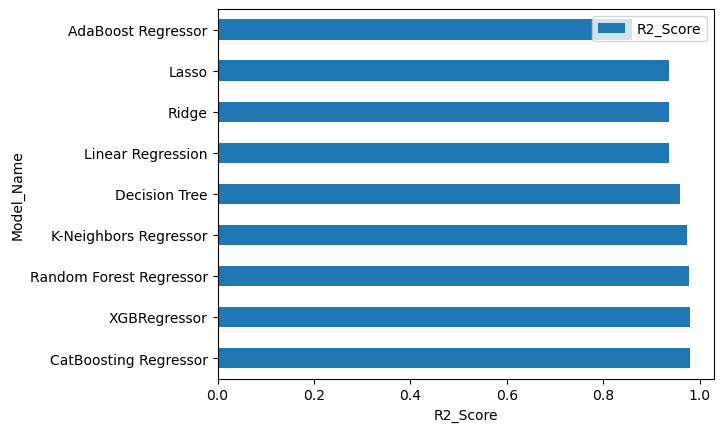

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model_Name", "R2_Score"]).sort_values("R2_Score",ascending = False).plot(x="Model_Name", y="R2_Score", kind= "barh")
plt.xlabel("R2_Score")
plt.show()

### Decision Creterion:
Catboostregressor produces the best R2 score.

In [ ]:
catboostreg= CatBoostRegressor(verbose=False)
catboostreg=catboostreg.fit(X_train, y_train)
y_test_pred=catboostreg.predict(X_test)
R2_score=r2_score(y_test, y_test_pred)
print(f"The model r2 score is: {R2_score}")

Learning rate set to 0.090822
0:	learn: 3701.8523878	total: 151ms	remaining: 2m 31s
1:	learn: 3405.9141381	total: 248ms	remaining: 2m 3s
2:	learn: 3129.2471970	total: 384ms	remaining: 2m 7s
3:	learn: 2880.6379862	total: 448ms	remaining: 1m 51s
4:	learn: 2653.8566343	total: 511ms	remaining: 1m 41s
5:	learn: 2449.3677215	total: 624ms	remaining: 1m 43s
6:	learn: 2262.8573527	total: 722ms	remaining: 1m 42s
7:	learn: 2092.4108824	total: 784ms	remaining: 1m 37s
8:	learn: 1936.5088637	total: 885ms	remaining: 1m 37s
9:	learn: 1799.9022653	total: 974ms	remaining: 1m 36s
10:	learn: 1673.1451102	total: 1.06s	remaining: 1m 35s
11:	learn: 1557.3582242	total: 1.26s	remaining: 1m 43s
12:	learn: 1457.5849361	total: 1.38s	remaining: 1m 44s
13:	learn: 1366.7970426	total: 1.45s	remaining: 1m 42s
14:	learn: 1285.9398865	total: 1.55s	remaining: 1m 41s
15:	learn: 1211.3552714	total: 1.67s	remaining: 1m 42s
16:	learn: 1145.5113886	total: 1.74s	remaining: 1m 40s
17:	learn: 1087.5816410	total: 1.84s	remaining:

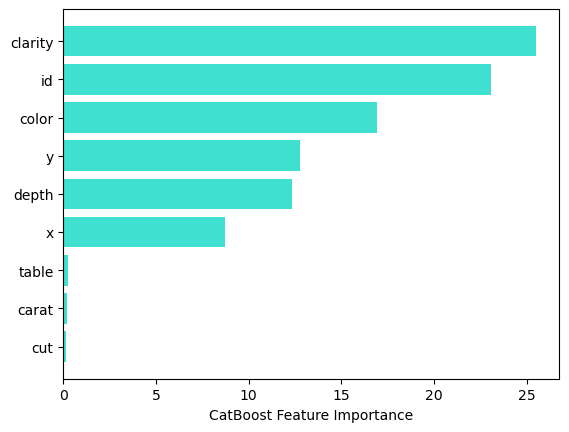

In [ ]:
# Catboostreg can also help in providing feature importance as follows
sorted_feature_importance = catboostreg.feature_importances_.argsort()

plt.barh(df.columns[sorted_feature_importance], 
        catboostreg.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")
plt.show()

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred, '% Diff':((y_test-y_test_pred)/y_test*100)})
pred_df

,Actual Value,Predicted Value,Difference,% Diff
53054,2339,2232.125778,106.874222,4.569227
29201,2167,1971.675775,195.324225,9.013578
154203,2176,1972.194683,203.805317,9.366053
143467,844,699.592046,144.407954,17.109947
21594,3519,3526.282804,-7.282804,-0.206957
...,...,...,...,...
154576,1282,1346.307702,-64.307702,-5.016201
64452,16472,15727.843933,744.156067,4.517703
45008,730,790.425146,-60.425146,-8.277417
78269,2537,2625.079424,-88.079424,-3.471794


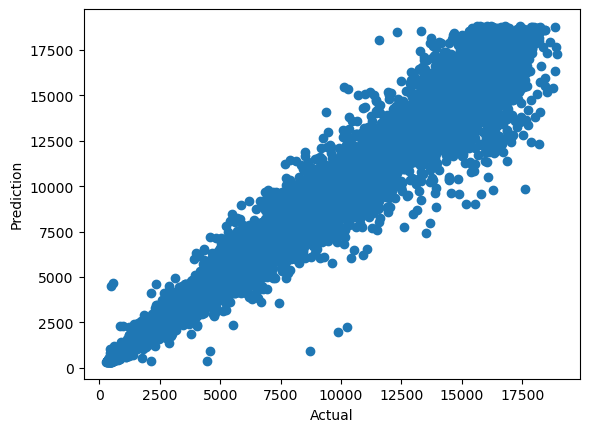

In [ ]:
plt.scatter(y_test_pred, y_test);
plt.xlabel("Actual");
plt.ylabel("Prediction");
plt.show()

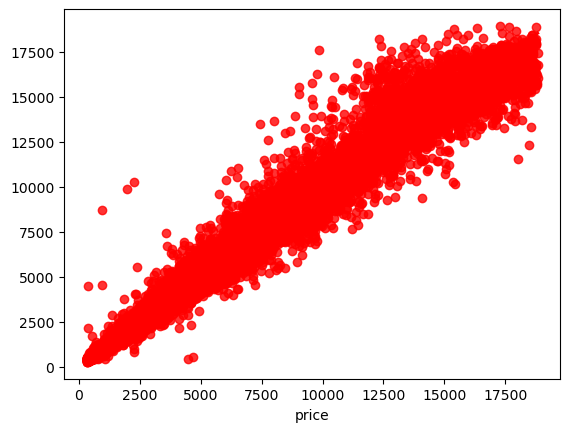

In [ ]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');